In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from project2 import *
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
import random, time

# Gradient descent

## Simple $p$-degree polynomial + noise

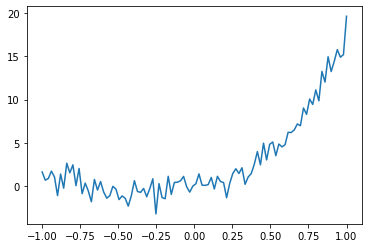

In [2]:
from project2.test import test_func_poly_deg_p
np.random.seed(3155)
avec = np.array([0,4,5, 4,5])
deg = len(avec)-1
x = np.linspace(-1,1,100)
y = test_func_poly_deg_p(deg = deg, avec = avec, x = x)
ynoisy = y + np.random.normal(size=y.shape)
plt.plot(x, ynoisy)

## Implementation of GD

In [3]:
# import cost functions
from project2.optimization import cost_Lasso, cost_OLS, cost_Ridge
deg = 4
# use: derivate with respect to the (function, n) nth argument (starts at zero)
from autograd import grad
gradient = grad(cost_OLS,2) # 2 indicates the third argument of the cost functions arguments
niterations = int(1e3)
X = np.ones((x.shape[0],deg))
for i in range(1,X.shape[1]):
    X[:,i] = x**i
theta = np.random.normal(size=(X.shape[1]))
eta = 1e-3
for niter in range(niterations):
    gradients = gradient(X, y, theta)
    theta -= eta*gradients

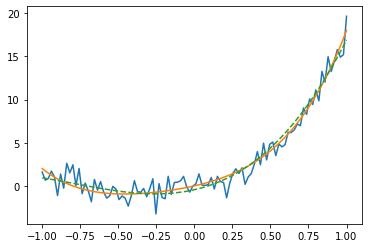

In [4]:
plt.plot(x, ynoisy)
plt.plot(x, y)
plt.plot(x, X @ theta, ls='--')

In [14]:
from project2.optimization import grad_desc
theta, bconv = grad_desc(X, y, cost_OLS, eta = 1e-4, check_conv=True, tol=1e2)

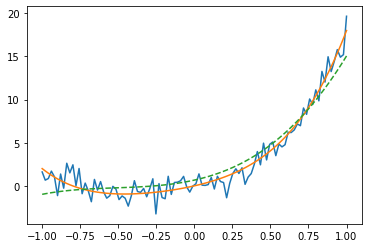

In [15]:
plt.plot(x, ynoisy)
plt.plot(x, y)
plt.plot(x, X @ theta, ls='--')

In [16]:
bconv

True